<a href="https://colab.research.google.com/github/zeynepsevimkanar/bookprices/blob/main/BookpriceDataCleaning_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
book_price = pd.read_excel('book_price.xlsx')
#after reading the data into the program, first and last 5 lines of the data was examined below
book_price.head()

,Unnamed: 0,Price,Currency Unit,Publisher,Type,No Of Page,Rating,Clicking Rate,Shipping Fee,Year,Second Hand
0,0,84.350000,TL,Can,Science,62.000000,7.24,5.534,16.00000,2017,No
1,1,86.700000,TL,Doğan,Science,86.000000,7.03,5.283,18.00000,2019,No
2,2,74.400000,TL,Can,Science,67.000000,5.14,5.294,20.88785,2017,No
3,3,76.822476,TL,Doğan,Novel,78.781818,13.14,6.094,20.88785,2022,No
4,4,61.370000,TL,Can,Science,78.781818,2.77,4.547,23.00000,2016,Yes


In [3]:
book_price.tail()

,Unnamed: 0,Price,Currency Unit,Publisher,Type,No Of Page,Rating,Clicking Rate,Shipping Fee,Year,Second Hand
120,120,84.820000,TL,Can,History,78.781818,6.50,5.250000,13.0,2018,No
121,121,76.822476,TL,Can,History,81.000000,4.87,5.066099,25.0,2017,No
122,122,58.410000,TL,Can,History,78.781818,2.02,4.702000,19.0,2016,Yes
123,123,77.960000,TL,Can,History,64.000000,6.30,4.970000,20.0,2018,No
124,124,59.820000,TL,Can,Novel,78.781818,3.10,4.500000,25.0,2016,Yes


In [4]:
book_price.info()
#the value counts and the data types was presented

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     125 non-null    int64  
 1   Price          125 non-null    float64
 2   Currency Unit  125 non-null    object 
 3   Publisher      125 non-null    object 
 4   Type           125 non-null    object 
 5   No Of Page     125 non-null    float64
 6   Rating         125 non-null    float64
 7   Clicking Rate  125 non-null    float64
 8   Shipping Fee   125 non-null    float64
 9   Year           125 non-null    int64  
 10  Second Hand    125 non-null    object 
dtypes: float64(5), int64(2), object(4)
memory usage: 10.9+ KB


In [5]:
book_price.columns = book_price.columns.str.title()
book_price.columns

Index(['Unnamed: 0', 'Price', 'Currency Unit', 'Publisher', 'Type',
       'No Of Page', 'Rating', 'Clicking Rate', 'Shipping Fee', 'Year',
       'Second Hand'],
      dtype='object')

In [6]:
book_price = book_price.rename(columns = {"Price": "Price",
                                  "Currency_Unit":"Currency Unit",
                                  "No_Of_Page": "No Of Page",
                                  "Clicking_Rate": "Clicking Rate",
                                  "Shipping_Fee": "Shipping Fee",
                                  "Second_Hand": "Second Hand"})
book_price.columns = ['Unnamed','Price', 'Currency Unit', 'Publisher', 'Type', 'No Of Page', 'Rating', 'Clicking Rate', 'Shipping Fee', 'Year', 'Second Hand']
book_price.head()
#the column names were rehaped for practicality

,Unnamed,Price,Currency Unit,Publisher,Type,No Of Page,Rating,Clicking Rate,Shipping Fee,Year,Second Hand
0,0,84.350000,TL,Can,Science,62.000000,7.24,5.534,16.00000,2017,No
1,1,86.700000,TL,Doğan,Science,86.000000,7.03,5.283,18.00000,2019,No
2,2,74.400000,TL,Can,Science,67.000000,5.14,5.294,20.88785,2017,No
3,3,76.822476,TL,Doğan,Novel,78.781818,13.14,6.094,20.88785,2022,No
4,4,61.370000,TL,Can,Science,78.781818,2.77,4.547,23.00000,2016,Yes


In [7]:
book_price.describe()

,Unnamed,Price,No Of Page,Rating,Clicking Rate,Shipping Fee,Year
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,62.000000,76.822476,78.781818,5.714237,5.066099,20.887850,2017.640000
std,36.228442,12.987652,9.052162,2.551177,0.373001,3.802222,1.381911
min,0.000000,49.490000,59.000000,0.810000,4.387000,13.000000,2015.000000
25%,31.000000,67.610000,72.000000,3.630000,4.783000,19.000000,2017.000000
50%,62.000000,76.822476,78.781818,5.410000,5.066099,20.887850,2017.000000
75%,93.000000,83.470000,84.000000,7.100000,5.294000,23.000000,2018.000000
max,124.000000,122.830000,107.000000,13.880000,6.094000,30.000000,2022.000000


In [8]:
book_price['Currency Unit'] = book_price['Currency Unit'].fillna(book_price['Currency Unit'].mode()[0])
book_price['Publisher'] = book_price['Publisher'].fillna(book_price['Publisher'].mode()[0])
book_price['Type'] = book_price['Type'].fillna(book_price['Type'].mode()[0])
book_price['Year'] = book_price['Year'].fillna(book_price['Year'].mode()[0])
book_price['Second Hand'] = book_price['Second Hand'].fillna(book_price['Second Hand'].mode()[0])
book_price
#For the categorical variables 'Currency Unit', 'Publisher', 'Type', 'Year' and 'Second Hand' ;
#the mode of the observations were used to fill NaN values.  
#Also clean data was represented below

,Unnamed,Price,Currency Unit,Publisher,Type,No Of Page,Rating,Clicking Rate,Shipping Fee,Year,Second Hand
0,0,84.350000,TL,Can,Science,62.000000,7.24,5.534000,16.00000,2017,No
1,1,86.700000,TL,Doğan,Science,86.000000,7.03,5.283000,18.00000,2019,No
2,2,74.400000,TL,Can,Science,67.000000,5.14,5.294000,20.88785,2017,No
3,3,76.822476,TL,Doğan,Novel,78.781818,13.14,6.094000,20.88785,2022,No
4,4,61.370000,TL,Can,Science,78.781818,2.77,4.547000,23.00000,2016,Yes
...,...,...,...,...,...,...,...,...,...,...,...
120,120,84.820000,TL,Can,History,78.781818,6.50,5.250000,13.00000,2018,No
121,121,76.822476,TL,Can,History,81.000000,4.87,5.066099,25.00000,2017,No
122,122,58.410000,TL,Can,History,78.781818,2.02,4.702000,19.00000,2016,Yes
123,123,77.960000,TL,Can,History,64.000000,6.30,4.970000,20.00000,2018,No


In [9]:
book_price.duplicated().sum()
#the data was checked for duplicate values

0

In [10]:
for i in book_price.select_dtypes(include ='object').columns:
  print(book_price[i].value_counts())
#The data were checked for typos and value counts

TL    125
Name: Currency Unit, dtype: int64
Can      93
Doğan    31
Odtü      1
Name: Publisher, dtype: int64
Novel      88
History    28
Science     9
Name: Type, dtype: int64
No     101
Yes     24
Name: Second Hand, dtype: int64


In [11]:
book_price['Currency Unit'].loc[book_price['Currency Unit'] == 'tl'] = 'TL' 
book_price['Currency Unit'].loc[book_price['Currency Unit'] == 'Tl '] = 'TL' 
book_price['Currency Unit'].value_counts()
#the variable was reshaped into the same format

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


TL    125
Name: Currency Unit, dtype: int64

In [12]:
book_price['Publisher'].loc[book_price['Publisher'] == 'Dogan'] = 'Doğan'
book_price['Publisher'].loc[book_price['Publisher'] == 'DOGan '] = 'Doğan'  
book_price['Publisher'].loc[book_price['Publisher'] == 'Can'] = 'Can'  
book_price['Publisher'].loc[book_price['Publisher'] == 'ODTU'] = 'Odtü' 
book_price['Publisher'].value_counts()
#the variable was reshaped into the same format

Can      93
Doğan    31
Odtü      1
Name: Publisher, dtype: int64

In [13]:
book_price['Second Hand'].loc[book_price['Second Hand'] == 'no'] = 'No' 
book_price['Second Hand'].loc[book_price['Second Hand'] == 'NO'] = 'No'
book_price['Second Hand'].loc[book_price['Second Hand'] == 'yes'] = 'Yes' 
book_price['Second Hand'].loc[book_price['Second Hand'] == ' YeS'] = 'Yes'  
book_price['Second Hand'].value_counts()
#the variable was reshaped into the same format

No     101
Yes     24
Name: Second Hand, dtype: int64

In [14]:
book_price.isna().sum()
#the data was checked for null values

Unnamed          0
Price            0
Currency Unit    0
Publisher        0
Type             0
No Of Page       0
Rating           0
Clicking Rate    0
Shipping Fee     0
Year             0
Second Hand      0
dtype: int64

In [15]:
book_price.describe().transpose()
#The descriptive statistics of the data were computed

,count,mean,std,min,25%,50%,75%,max
Unnamed,125.0,62.000000,36.228442,0.000,31.000,62.000000,93.000,124.000
Price,125.0,76.822476,12.987652,49.490,67.610,76.822476,83.470,122.830
No Of Page,125.0,78.781818,9.052162,59.000,72.000,78.781818,84.000,107.000
Rating,125.0,5.714237,2.551177,0.810,3.630,5.410000,7.100,13.880
Clicking Rate,125.0,5.066099,0.373001,4.387,4.783,5.066099,5.294,6.094
Shipping Fee,125.0,20.887850,3.802222,13.000,19.000,20.887850,23.000,30.000
Year,125.0,2017.640000,1.381911,2015.000,2017.000,2017.000000,2018.000,2022.000


In [16]:
#the mean value was computed without outliers 
book_price.Price[book_price.Price<=200].mean()

76.82247619047617

In [17]:
mean_price_without_outliers=book_price.Price[book_price.Price<=200].mean()

In [18]:
#outliers were observed 
new_book_price=book_price
new_book_price.Price[new_book_price.Price>=200]

Series([], Name: Price, dtype: float64)

In [19]:
#we change the outliers with mean value
new_book_price.Price[new_book_price.Price>=200]=mean_price_without_outliers

<ipython-input-19-f2a1256f7488>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_book_price.Price[new_book_price.Price>=200]=mean_price_without_outliers


In [20]:
#The data was checked again for outliers
new_book_price.Price[new_book_price.Price>=200]

Series([], Name: Price, dtype: float64)

In [21]:
#the na values were filled with the mean 
new_book_price['Price'].fillna(value=mean_price_without_outliers, inplace=True)

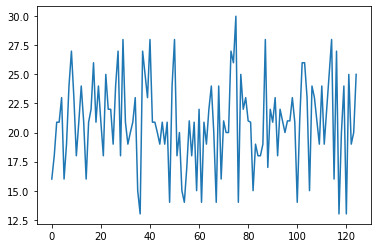

In [22]:
#outliers were observed below
new_book_price['Shipping Fee'].plot()

In [23]:
new_book_price['Shipping Fee'][new_book_price['Shipping Fee']>=150]

Series([], Name: Shipping Fee, dtype: float64)

In [24]:
#the mean value was computed without outliers 
new_book_price['Shipping Fee'][new_book_price['Shipping Fee']<=150].mean()

20.88785046728972

In [25]:
mean_shippingfee_without_outliers=new_book_price['Shipping Fee'][new_book_price['Shipping Fee']<=150].mean()

In [26]:
#since the Shipping Fee variable is numeric, the Na 's were filled with mean value
new_book_price['Shipping Fee'][new_book_price['Shipping Fee']>=150]=mean_shippingfee_without_outliers

<ipython-input-26-1fcac90700bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_book_price['Shipping Fee'][new_book_price['Shipping Fee']>=150]=mean_shippingfee_without_outliers


In [27]:
new_book_price['Shipping Fee'].fillna(value=mean_shippingfee_without_outliers, inplace=True)

In [28]:
new_book_price.describe()

,Unnamed,Price,No Of Page,Rating,Clicking Rate,Shipping Fee,Year
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,62.000000,76.822476,78.781818,5.714237,5.066099,20.887850,2017.640000
std,36.228442,12.987652,9.052162,2.551177,0.373001,3.802222,1.381911
min,0.000000,49.490000,59.000000,0.810000,4.387000,13.000000,2015.000000
25%,31.000000,67.610000,72.000000,3.630000,4.783000,19.000000,2017.000000
50%,62.000000,76.822476,78.781818,5.410000,5.066099,20.887850,2017.000000
75%,93.000000,83.470000,84.000000,7.100000,5.294000,23.000000,2018.000000
max,124.000000,122.830000,107.000000,13.880000,6.094000,30.000000,2022.000000


In [29]:
#number of null values were observed
new_book_price.isnull().sum()

Unnamed          0
Price            0
Currency Unit    0
Publisher        0
Type             0
No Of Page       0
Rating           0
Clicking Rate    0
Shipping Fee     0
Year             0
Second Hand      0
dtype: int64

In [30]:
new_df = pd.DataFrame(new_book_price.isnull().sum())
new_df.columns = ['Missing Number']
new_df['Missing Percentage'] = (new_df['Missing Number']*100)/book_price.shape[0]
new_df
#The missing percentages of the data were examined below. 
#It is seen that the missing percentages are less than %60. Thus, the null values were filled by the following.

,Missing Number,Missing Percentage
Unnamed,0,0.0
Price,0,0.0
Currency Unit,0,0.0
Publisher,0,0.0
Type,0,0.0
No Of Page,0,0.0
Rating,0,0.0
Clicking Rate,0,0.0
Shipping Fee,0,0.0
Year,0,0.0


In [31]:
#outliers were observed
book_price[book_price.Rating>=10]

,Unnamed,Price,Currency Unit,Publisher,Type,No Of Page,Rating,Clicking Rate,Shipping Fee,Year,Second Hand
3,3,76.822476,TL,Doğan,Novel,78.781818,13.14,6.094000,20.88785,2022,No
12,12,105.340000,TL,Doğan,Novel,69.000000,10.89,5.066099,24.00000,2021,No
40,40,105.790000,TL,Doğan,Novel,81.000000,11.07,5.187000,28.00000,2021,No
58,58,118.870000,TL,Doğan,Novel,72.000000,13.48,5.678000,20.88785,2022,No
93,93,106.920000,TL,Can,Novel,88.000000,10.56,5.836000,22.00000,2021,No
101,101,122.830000,TL,Doğan,History,88.000000,13.88,5.398000,21.00000,2017,No
114,114,76.822476,TL,Doğan,History,76.000000,10.65,6.035000,28.00000,2020,No


In [32]:
#the mean value was computed without outliers (known that the books were rated over)
mean_ratings_without_outliers=book_price.Rating[book_price.Rating<=10].mean()

In [33]:
#we change the outliers with mean value
new_book_price=book_price
new_book_price.Rating[new_book_price.Rating>=10] = mean_ratings_without_outliers

<ipython-input-33-d26f2606e20c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_book_price.Rating[new_book_price.Rating>=10] = mean_ratings_without_outliers


In [34]:
#The data was checked again for outliers
new_book_price.Rating[new_book_price.Rating>=10]

Series([], Name: Rating, dtype: float64)

In [35]:
new_book_price['No Of Page'].fillna(value=new_book_price['No Of Page'].mean(), inplace=True)
new_book_price['Rating'].fillna(value=book_price.Rating[book_price.Rating<=10].mean(), inplace=True)
new_book_price['Clicking Rate'].fillna(value=new_book_price['Clicking Rate'].mean(), inplace=True)
#Since 'number of pages', 'Rating' and 'clicking rate' are numerical values were used to fill na values.

In [36]:
#final number of nulls
new_book_price.isnull().sum()

Unnamed          0
Price            0
Currency Unit    0
Publisher        0
Type             0
No Of Page       0
Rating           0
Clicking Rate    0
Shipping Fee     0
Year             0
Second Hand      0
dtype: int64

In [37]:
new_book_price.head()
#final clean data was observed below

,Unnamed,Price,Currency Unit,Publisher,Type,No Of Page,Rating,Clicking Rate,Shipping Fee,Year,Second Hand
0,0,84.350000,TL,Can,Science,62.000000,7.24000,5.534,16.00000,2017,No
1,1,86.700000,TL,Doğan,Science,86.000000,7.03000,5.283,18.00000,2019,No
2,2,74.400000,TL,Can,Science,67.000000,5.14000,5.294,20.88785,2017,No
3,3,76.822476,TL,Doğan,Novel,78.781818,5.34415,6.094,20.88785,2022,No
4,4,61.370000,TL,Can,Science,78.781818,2.77000,4.547,23.00000,2016,Yes


In [38]:
new_book_price.tail()

,Unnamed,Price,Currency Unit,Publisher,Type,No Of Page,Rating,Clicking Rate,Shipping Fee,Year,Second Hand
120,120,84.820000,TL,Can,History,78.781818,6.50,5.250000,13.0,2018,No
121,121,76.822476,TL,Can,History,81.000000,4.87,5.066099,25.0,2017,No
122,122,58.410000,TL,Can,History,78.781818,2.02,4.702000,19.0,2016,Yes
123,123,77.960000,TL,Can,History,64.000000,6.30,4.970000,20.0,2018,No
124,124,59.820000,TL,Can,Novel,78.781818,3.10,4.500000,25.0,2016,Yes


In [39]:
#year variable was converted to the right data type 
book_price['Year'] = book_price['Year'].astype(int)

In [40]:
pd.to_datetime(book_price.Year, format='%Y')

0     2017-01-01
1     2019-01-01
2     2017-01-01
3     2022-01-01
4     2016-01-01
         ...    
120   2018-01-01
121   2017-01-01
122   2016-01-01
123   2018-01-01
124   2016-01-01
Name: Year, Length: 125, dtype: datetime64[ns]

In [41]:
new_book_price['Year'] = pd.to_datetime(book_price.Year, format='%Y')

In [42]:
#the data was checked again for the right data types
book_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed        125 non-null    int64         
 1   Price          125 non-null    float64       
 2   Currency Unit  125 non-null    object        
 3   Publisher      125 non-null    object        
 4   Type           125 non-null    object        
 5   No Of Page     125 non-null    float64       
 6   Rating         125 non-null    float64       
 7   Clicking Rate  125 non-null    float64       
 8   Shipping Fee   125 non-null    float64       
 9   Year           125 non-null    datetime64[ns]
 10  Second Hand    125 non-null    object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 10.9+ KB


In [43]:
#the  clean data was downloaded as an excel file 
book_price.to_excel('book_priceCleanData.xlsx')